# 결측치 처리

In [1]:
# 타이타닉 데이터셋

import pandas as pd

df= pd.read_csv("https://raw.githubusercontent.com/YoungJinBD/dataset/main/titanic.csv")
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [2]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


결측치 대체
- 완전분석법: 결측값이 있는 행을 삭제
- 평균대치법: 결측값을 평균으로 대치
- 단순확률대치법: 확률 분포를 이용한 추정 값으로 대치 또는 주변값 대치

In [3]:
# 결측치가 있는 모든 행 제거
df_1 = df.dropna(axis=0) # axis=0: 모든 행, 1: 모든 열

print(df_1.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [4]:
# 결측치를 지정값으로 변경

age_mean = df["Age"].mean()
df["Age"].fillna(age_mean , inplace=True) # age를 평균값으로 대체

from scipy.stats import mode

embarked_mode = df["Embarked"].mode()
df["Embarked"].fillna(embarked_mode[0],inplace=True) # 최빈값으로 대체

df.info()

<ipython-input-4-25da0dcf58ff>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(age_mean , inplace=True) # age를 평균값으로 대체


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ipython-input-4-25da0dcf58ff>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(embarked_mode[0],inplace=True) # 최빈값으로 대체


In [5]:
# 결측치를 인접한 값으로 대체

df["Embarked"].fillna(method='ffill',inplace=True)

<ipython-input-5-2b3c412df794>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Embarked"].fillna(method='ffill',inplace=True)


In [6]:
# group by함수를 사용하여 그룹별 평균 age 구하기

print(df.groupby('Sex')['Age'].mean())
print(df.groupby("Pclass")['Age'].mean())

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64
Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64


In [7]:
df.groupby('Sex')['Age'].mean() # 이런식으로 판다스의 형태로 나오기 떄문에 변환을 진행한 후 삽입해줘야 함

# df['Age'].fillna(df.groupby{'Sax'}["Age"].transform("mean"),inplace=True)

,Age
Sex,
female,28.216730
male,30.505824


# 이상치 처리

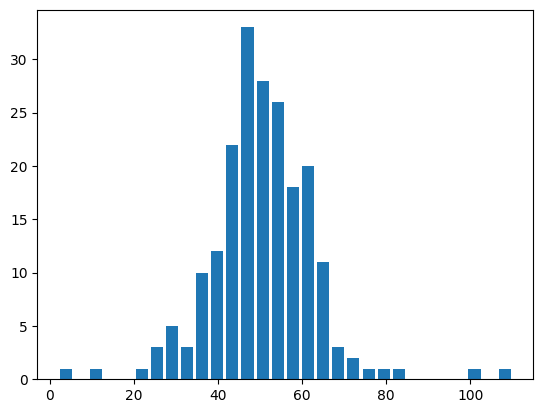

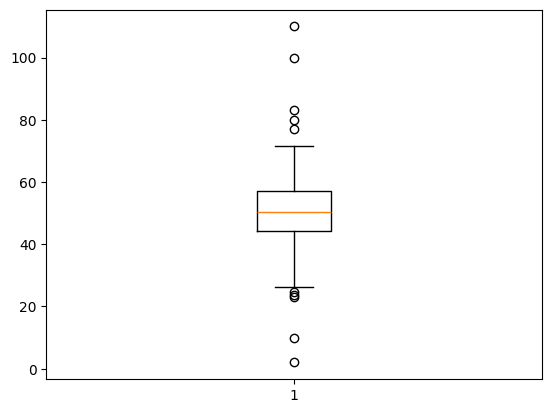

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = 10*np.random.randn(200)+50
df= pd.DataFrame({'값':data})

# 임의의 이상치를 삽입
df.loc[201]=2
df.loc[202]=100
df.loc[203]=10
df.loc[204]=110

# 분포 시각화
plt.hist(df['값'],bins=30,rwidth=0.8)
plt.show()

# 박스플롯
plt.boxplot(df['값'])
plt.show()

In [17]:
Q1 = df["값"].quantile(.25)  # df["값"].describe()["25%"]: 제1사분위 수
Q2 = df["값"].quantile(.50)
Q3 = df["값"].quantile(.75)
IQR = Q3-Q1

print(Q1,Q2,Q3,IQR)

44.39701370214519 50.28137675435254 57.23553394688704 12.83852024474185


이상치: 3사분위수 + IQR * 1.5 보다 크거나 1사분위수 - IQR * 1.5 보다 작으면 이상치라고 판단될 수 있다.

In [26]:
condition = df['값']>(Q3+IQR*1.5)
upper = df[condition]

condition = df["값"]<(Q1-IQR*1.5)
lower = df[condition]

print(lower)
print(upper)

             값
4    23.630880
34   24.680239
149  22.900460
201   2.000000
203  10.000000
              값
121   83.125927
156   76.914033
160   79.976648
202  100.000000
204  110.000000
